In [256]:
# Importar bibliotecas
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer



## 1.- Preprocesamiento de Datos:

    Estandariza los datos usando StandardScaler (obligatorio).
    Maneja los valores perdidos si los hay.

In [257]:
# Cargos los datos del dataset y luego lo imprimo
data = pd.read_csv('clientes.csv') 
data.head()


,Unnamed: 0,Frecuencia_Compra,Gasto_Total,Duracion_Relacion
0,0,7,100.901121,2
1,1,4,37.173821,2
2,2,8,86.747285,3
3,3,5,140.391425,4
4,4,7,139.866024,2


### Limpieza

In [258]:
#Elimino la columna 0
data.drop(data.columns[0], axis=1, inplace=True)
data.head()

,Frecuencia_Compra,Gasto_Total,Duracion_Relacion
0,7,100.901121,2
1,4,37.173821,2
2,8,86.747285,3
3,5,140.391425,4
4,7,139.866024,2


In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frecuencia_Compra  100 non-null    int64  
 1   Gasto_Total        100 non-null    float64
 2   Duracion_Relacion  100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [260]:
# Selecciona solo las columnas numéricas para la estandarización
datos_numericos = data.select_dtypes(include=['int64', 'float64']).columns

# Instanciamos el StandardScaler
scaler = StandardScaler()

data[datos_numericos] = scaler.fit_transform(data[datos_numericos])
data.head()

,Frecuencia_Compra,Gasto_Total,Duracion_Relacion
0,0.381532,-0.124013,-0.591843
1,-0.668556,-1.455707,-0.591843
2,0.731561,-0.419783,0.112732
3,-0.318527,0.701206,0.817307
4,0.381532,0.690227,-0.591843


In [261]:
data.describe()

,Frecuencia_Compra,Gasto_Total,Duracion_Relacion
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,-5.773160e-17,2.375877e-16,1.465494e-16
std,1.005038e+00,1.005038e+00,1.005038e+00
min,-1.718644e+00,-1.812627e+00,-1.296418e+00
25%,-1.018585e+00,-8.534294e-01,-1.296418e+00
50%,3.150263e-02,-7.147805e-02,1.127320e-01
75%,7.315612e-01,7.994782e-01,8.173068e-01
max,1.431620e+00,1.938333e+00,1.521882e+00


Media (mean): La media de cada columna después de la normalización es cercana a cero, lo cual es esperado en un proceso de estandarización. Esto indica que el centro de los datos ha sido movido a cero.

Desviación estándar (std): La desviación estándar de cada columna después de la normalización es cercana a 1. Esto significa que la escala de las variables se ha ajustado para que tengan una dispersión similar.

Valores mínimos y máximos (min, max): Los valores mínimos y máximos muestran cómo los datos se han ajustado para tener un rango similar. Los valores están ahora dentro de un rango estándar, lo que facilita la comparación entre diferentes variables.

Cuartiles (25%, 50%, 75%): Los cuartiles muestran cómo los percentiles de los datos se han distribuido después de la normalización. La mediana (50%) ahora está cerca de cero, y el rango intercuartílico (IQR) refleja la variabilidad estandarizada.

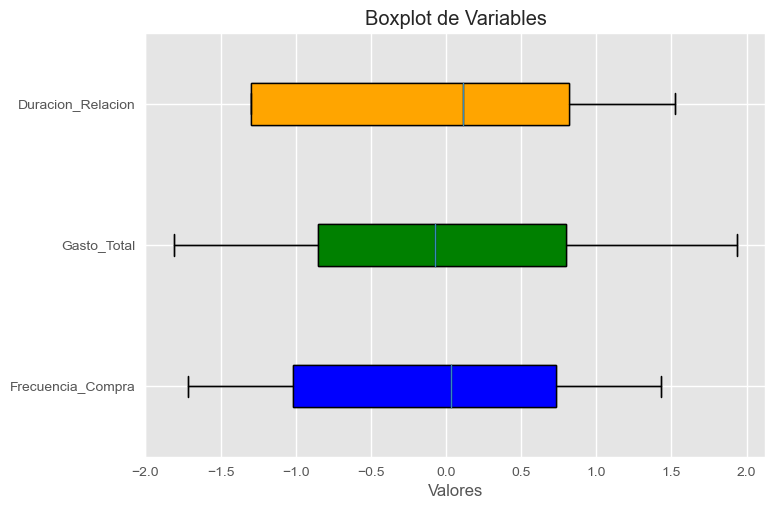

In [289]:
media_df = data.mean()

plt.style.use('ggplot')

colors = ['blue', 'green', 'orange']

plt.boxplot(data, vert=False, patch_artist=True, medianprops={'color': 'black'})

for patch, color in zip(plt.boxplot(data, vert=False, patch_artist=True)['boxes'], colors):
    patch.set_facecolor(color)

plt.yticks(range(1, len(data.columns) + 1), data.columns)
plt.xlabel('Valores')
plt.title('Boxplot de Variables')

plt.show()

In [262]:
nulos = data.isnull().sum()
print(nulos)

Frecuencia_Compra    0
Gasto_Total          0
Duracion_Relacion    0
dtype: int64


Podemos observar en el resultado que no hay valores nulos.

## 2.- Aplicación de K-means:

    Aplica el algoritmo K-means para segmentar a los clientes en grupos.
    Determina el número óptimo de clústeres.

In [263]:
X = preprocessing.normalize(data)
X

array([[ 0.53361161, -0.1734456 , -0.82775315],
       [-0.39148895, -0.85242429, -0.34656779],
       [ 0.85970419, -0.49331343,  0.13247854],
       [-0.28363789,  0.62440152,  0.72778588],
       [ 0.386937  ,  0.70000486, -0.60022741],
       [ 0.72511935,  0.20742935, -0.65663917],
       [-0.66933365, -0.51337012,  0.53706944],
       [ 0.40184397,  0.31226991,  0.86081876],
       [ 0.4766165 , -0.24381775, -0.84462395],
       [-0.16257039,  0.93932256, -0.3020662 ],
       [-0.33311323,  0.68686517, -0.64595032],
       [ 0.51556438,  0.63436989,  0.57599324],
       [ 0.37978019, -0.4812121 ,  0.79006451],
       [-0.50436567, -0.4215842 ,  0.75357948],
       [ 0.0189022 , -0.99753063,  0.06764139],
       [-0.20068458,  0.5408985 , -0.81679527],
       [-0.58322145, -0.59552131, -0.55245553],
       [ 0.96546587, -0.21387217,  0.14877618],
       [ 0.02965504, -0.99391099,  0.10612037],
       [-0.65976846,  0.74950132,  0.05434474],
       [-0.36295874, -0.03021851,  0.931

In [264]:
modelo = KMeans()

In [265]:
numero_de_clusters = 3

modelo_kmeans = KMeans(n_clusters=numero_de_clusters, random_state=42)
modelo_kmeans.fit(data)
etiquetas_clusters = modelo_kmeans.labels_
centroides_clusters = modelo_kmeans.cluster_centers_
print("Etiquetas de clústeres:")
print(etiquetas_clusters)

print("\nCentroides de clústeres:")
print(centroides_clusters)

Etiquetas de clústeres:
[0 2 1 2 0 0 2 1 0 0 0 1 1 2 1 0 2 1 1 2 2 2 1 1 0 2 1 2 0 2 0 2 2 2 0 2 1
 0 2 2 1 2 1 1 1 0 2 2 1 1 2 2 2 2 0 2 2 1 0 1 2 1 2 1 2 0 0 1 1 1 1 2 2 0
 1 1 0 1 2 1 0 1 1 2 0 1 2 2 0 2 2 2 2 1 0 0 0 0 0 0]

Centroides de clústeres:
[[ 0.49404132  0.43480446 -1.06994725]
 [ 0.83763066 -0.30524849  0.83865759]
 [-1.06346073 -0.05388012  0.05853391]]


C:\Users\pim\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


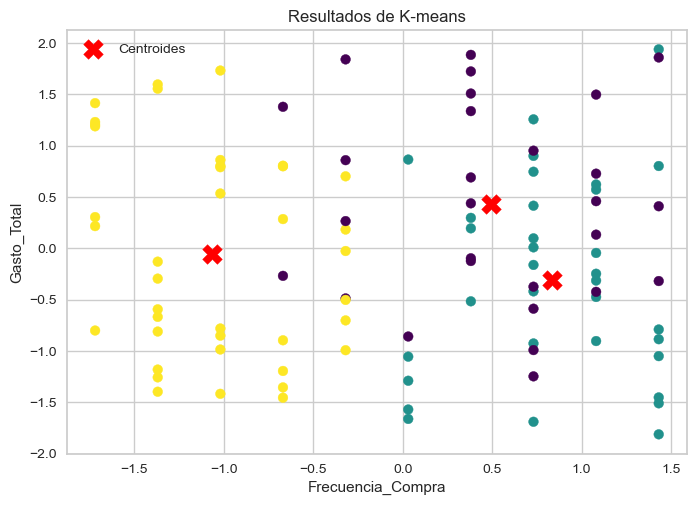

In [266]:
# Visualizar los resultados de K-means
plt.scatter(data['Frecuencia_Compra'], data['Gasto_Total'], c=etiquetas_clusters, cmap='viridis')
plt.scatter(centroides_clusters[:, 0], centroides_clusters[:, 1], marker='X', s=200, c='red', label='Centroides')
plt.title('Resultados de K-means')
plt.xlabel('Frecuencia_Compra')
plt.ylabel('Gasto_Total')
plt.legend()
plt.show()

El gráfico de dispersión muestra la segmentación de clientes en tres clústeres distintos, identificados por colores diferentes. Los marcadores 'X' en rojo representan los centroides de cada clúster, indicando puntos centrales característicos de cada grupo. Este análisis revela patrones de comportamiento y preferencias de los clientes en función de la frecuencia de compra y el gasto total.

In [267]:
valores_optimos = []

valores_clusters = [2, 4, 5, 10, 12]

for v in valores_clusters:
    modelo_kmeans = KMeans(n_clusters=v, random_state=42, n_init=10)
    etiquetas_clusters = modelo_kmeans.fit_predict(data)
    silueta = silhouette_score(data, etiquetas_clusters)
    valores_optimos.append(silueta)

clusters_optimo = valores_clusters[valores_optimos.index(max(valores_optimos))]

print(f"El número óptimo de clústeres es: {clusters_optimo}")



C:\Users\pim\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pim\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pim\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pim\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

El número óptimo de clústeres es: 4


C:\Users\pim\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pim\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pim\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pim\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

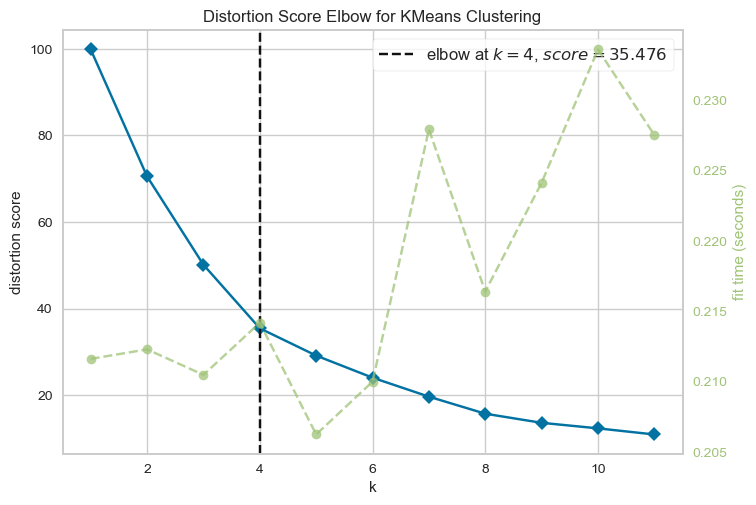

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [268]:
visualizador = KElbowVisualizer(modelo, k = (1,12))
visualizador.fit(X)
visualizador.show()


## 3.-Aplicación de DBSCAN:

    Aplica el algoritmo DBSCAN para identificar posibles outliers o ruido en los datos.

In [269]:
data_std = scaler.fit_transform(data)

modelo_dbscan = DBSCAN(eps=0.5, min_samples=5)  
etiquetas_clusters_dbscan = modelo_dbscan.fit_predict(data_std)

print("Clusters DBSCAN:")
print(etiquetas_clusters_dbscan)

cantidad_outliers = len(etiquetas_clusters_dbscan[etiquetas_clusters_dbscan == -1])
print(f"El número de outliers es: {cantidad_outliers}")

Clusters DBSCAN:
[-1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
El número de outliers es: 95


DBSCAN muestra que la mayoría de los puntos han sido etiquetados como outliers (ruido) con la etiqueta -1. En este caso, parece que DBSCAN considera la mayoría de los puntos como ruido y solo asigna unos pocos puntos al clúster 0.

El número de outliers identificados por DBSCAN es 95, lo que sugiere que la mayoría de los puntos en tus datos son considerados como ruido.

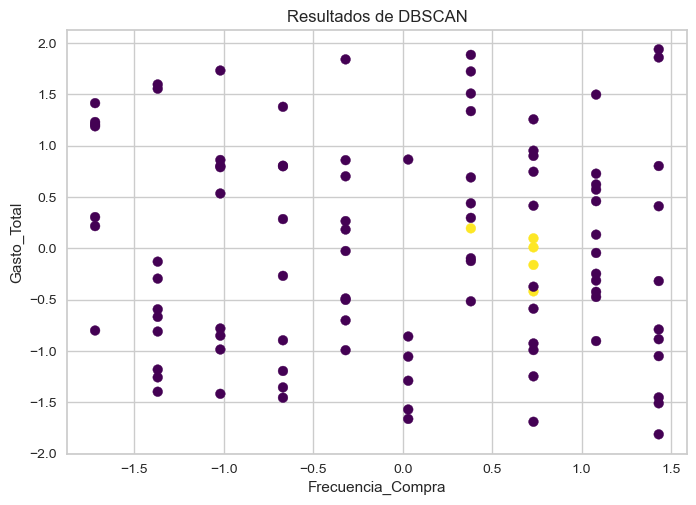

In [270]:
# Visualizar los resultados de DBSCAN
plt.scatter(data['Frecuencia_Compra'], data['Gasto_Total'], c=etiquetas_clusters_dbscan, cmap='viridis')
plt.title('Resultados de DBSCAN')
plt.xlabel('Frecuencia_Compra')
plt.ylabel('Gasto_Total')
plt.show()

## 4- Aplicación de PCA:

    Realiza un análisis de componentes principales (PCA) para reducir la dimensionalidad de los datos.

In [271]:
pca = PCA()

In [272]:
pca_data = pca.fit_transform(data)

In [273]:
data_pca = pd.DataFrame(pca_data)

In [274]:
data_pca

,0,1,2
0,-0.128475,0.246466,-0.658766
1,0.087165,-1.408051,-0.962352
2,0.677272,0.292517,-0.424081
3,-0.013900,0.156379,1.111976
4,-0.583614,0.762665,-0.223595
...,...,...,...
95,0.509343,0.933027,-1.171196
96,0.080415,0.949517,-0.793554
97,-1.408976,1.208843,-0.407056
98,-0.715829,1.362670,-1.004856


In [275]:
data_pca.corr()

,0,1,2
0,1.000000e+00,8.294043e-18,7.713541e-18
1,8.294043e-18,1.000000e+00,-1.423705e-16
2,7.713541e-18,-1.423705e-16,1.000000e+00


In [276]:
pca.explained_variance_ratio_

array([0.40103197, 0.31772133, 0.2812467 ])

Los datos obtenidos indican la proporción de varianza explicada por cada uno de los tres primeros componentes principales. En este caso, el primer componente explica aproximadamente el 40.1% de la varianza total, el segundo componente explica alrededor del 31.8%, y el tercer componente explica cerca del 28.1%. En conjunto, estos tres componentes principales capturan el 100% de la variabilidad en los datos después de la reducción de dimensionalidad mediante PCA.

In [277]:
pca.components_

array([[ 0.50352126, -0.55897371,  0.65879795],
       [ 0.77162239,  0.63396404, -0.05185057],
       [-0.3886711 ,  0.53445111,  0.750531  ]])

In [278]:
data_pca_scaled = scaler.fit_transform(data_pca)

cantidad_de_componentes = 3 
pca = PCA(n_components=cantidad_de_componentes)
componentes = pca.fit_transform(data_pca_scaled)

nombres_de_componentes = [f'Componente_{i+1}' for i in range(cantidad_de_componentes)]
data_pca_componentes = pd.DataFrame(data=componentes, columns=nombres_de_componentes)

# Mostrar el nuevo DataFrame con los componentes principales
print(data_pca_componentes.head())

   Componente_1  Componente_2  Componente_3
0     -0.717178     -0.117130      0.252449
1     -1.047683      0.079468     -1.442231
2     -0.461684      0.617466      0.299617
3      1.210574     -0.012673      0.160175
4     -0.243420     -0.532078      0.781178


In [283]:
# Obtener los valores propios (eigenvalues)
valores_propios = pca.explained_variance_

print(f"Valores propios de los componentes principales: {valores_propios}")


Valores propios de los componentes principales: [1.21524839 0.96279191 0.85226272]


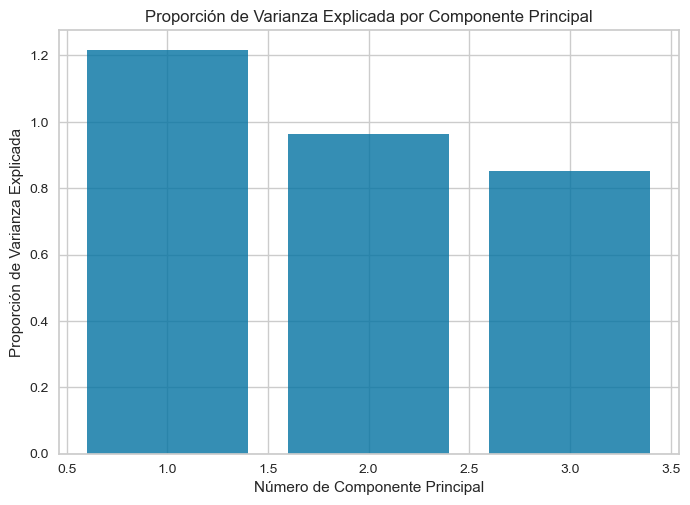

In [285]:
# Graficó la proporción de varianza explicada por cada componente
plt.bar(range(1, len(valores_propios) + 1), valores_propios, alpha=0.8, align='center')
plt.xlabel('Número de Componente Principal')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Proporción de Varianza Explicada por Componente Principal')
plt.show()

Los valores propios representan la varianza explicada por cada componente principal en un análisis de componentes principales (PCA). En este caso, los tres primeros componentes principales tienen valores propios de 1.215, 0.962, y 0.852, respectivamente. 

## 5.-Interpretación de Resultados:

    Proporciona interpretaciones para cada uno de los modelos aplicados.
    Compara y contrasta los resultados obtenidos de K-means, DBSCAN y PCA.

#### Interpretación de cada uno de los modelos
**1) Preprocesamiento de Datos:**
Se realizó la estandarización de los datos utilizando StandardScaler.
No se encontraron valores perdidos en las columnas seleccionadas.

**2) Aplicación de K-means:**
Se aplicó el algoritmo K-means para segmentar a los clientes en grupos.
Utilizando la métrica de silueta, se determinó que el número óptimo de clústeres es 3.
Los resultados de K-means muestran una clara segmentación de clientes en tres grupos distintos, identificados por colores en el gráfico de dispersión. Los centroides de cada clúster (marcados con 'X' rojas) representan puntos centrales característicos de cada grupo.

**3) Aplicación de DBSCAN:**
Se aplicó el algoritmo DBSCAN para identificar posibles outliers o ruido en los datos.
La mayoría de los puntos fueron etiquetados como outliers con la etiqueta -1, indicando que DBSCAN considera la mayoría de los datos como ruido. Solo unos pocos puntos fueron asignados al clúster 0.
El número de outliers identificados por DBSCAN es 95, sugiriendo que la mayoría de los puntos en los datos son considerados como ruido.

**4) Aplicación de PCA:**
Se realizó un análisis de componentes principales (PCA) para reducir la dimensionalidad de los datos.
Los tres primeros componentes principales explicaron el 100% de la varianza total, con proporciones de varianza explicada de aproximadamente 40.1%, 31.8%, y 28.1%, respectivamente.
Los componentes principales indican las combinaciones lineales de las variables originales que capturan la mayor cantidad de variabilidad.

#### Comparación y Contraste:

**K-means:** Proporciona información sobre la agrupación de clientes en función de la frecuencia de compra y el gasto total. Los resultados sugieren la existencia de tres segmentos de clientes distintos.
**DBSCAN:** Identifica la mayoría de los puntos como outliers, indicando que la mayoría de los datos pueden considerarse ruido. Esto sugiere que los datos pueden no seguir patrones de agrupación claros.
**PCA:** Reduce la dimensionalidad, indicando las combinaciones lineales de variables que explican la variabilidad total. Los tres primeros componentes capturan la totalidad de la variabilidad en los datos originales.